In [1]:
!pypinfo --auth key.json


Credentials location set to "key.json".


In [2]:
# if you want one-off data by package and OS
!pypinfo django system distro


Served from cache: False
Data processed: 1.21 GiB
Data billed: 1.21 GiB
Estimated cost: $0.01

| system_name | distro_name              | download_count |
| ----------- | ------------------------ | -------------- |
| Linux       | Debian GNU/Linux         |      2,763,889 |
| Linux       | Ubuntu                   |      2,482,082 |
| Windows     | None                     |        328,649 |
| Linux       | Alpine Linux             |        272,285 |
| Linux       | Amazon Linux AMI         |        224,974 |
| Linux       | CentOS Linux             |        207,654 |
| Darwin      | macOS                    |        109,961 |
| Linux       | Amazon Linux             |         86,385 |
| Linux       | None                     |         51,769 |
| Linux       | Red Hat Enterprise Linux |         23,972 |
| Total       |                          |      6,551,620 |



In [4]:
names=['django', 'flask', 'fastapi']
for name in names:
    !python pypi-trends.py -p typing
    !python json2csv.py --chart -p typing

ing-2020-02.json exists, skipping
2020-01-01 2020-01-31
  data/typing-2020-01.json exists, skipping
2019-12-01 2019-12-31
  data/typing-2019-12.json exists, skipping
2019-11-01 2019-11-30
  data/typing-2019-11.json exists, skipping
2019-10-01 2019-10-31
  data/typing-2019-10.json exists, skipping
2019-09-01 2019-09-30
  data/typing-2019-09.json exists, skipping
2019-08-01 2019-08-31
  data/typing-2019-08.json exists, skipping
2019-07-01 2019-07-31
  data/typing-2019-07.json exists, skipping
2019-06-01 2019-06-30
  data/typing-2019-06.json exists, skipping
2019-05-01 2019-05-31
  data/typing-2019-05.json exists, skipping
2019-04-01 2019-04-30
  data/typing-2019-04.json exists, skipping
2019-03-01 2019-03-31
  data/typing-2019-03.json exists, skipping
2019-02-01 2019-02-28
  data/typing-2019-02.json exists, skipping
2019-01-01 2019-01-31
  data/typing-2019-01.json exists, skipping
2018-12-01 2018-12-31
  data/typing-2018-12.json exists, skipping
2018-11-01 2018-11-30
  data/typing-2018-1

In [5]:
import os
import json
import matplotlib as plt
import numpy as np

dir = r'data'
# create dict with data to plot 
packages_over_time = {}

#iterate over each file in the data directory
for filename in os.listdir(dir):
    if filename.endswith('.json'):
        #load data 
        with open(os.path.join(dir,filename)) as f:
            data = json.load(f)
            count = 0
            for row in data['rows']:
                count += row['download_count']
                temp = filename.replace('.', '-').split('-')
                date = temp[1] + '-' + temp[2]
                package_name = temp[0]
                if package_name not in packages_over_time:
                    packages_over_time[package_name] = {};
                
                package = packages_over_time[package_name]
                package[date] = count


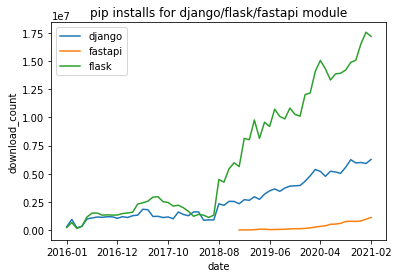

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 9, 40)


# for each package in m
for p in packages_over_time:
    # ignore modules we don't want on the same chart
    if p not in names:
        break
    x_axis = []
    y_axis = []
    
    package_data = packages_over_time[p]
    for date in package_data:
        x_axis.append(date)
        y_axis.append(package_data[date])
    
    plt.plot(x_axis, y_axis, label=p)

#clean up x-axis ticks
ax = plt.gca()
ax.set(xticks=x_axis[::10], xticklabels=x_axis[::10])

#configure the chart area with axes and a title
plt.xlabel('date')
plt.ylabel('download_count')
plt.title(f"pip installs for {'/'.join(names)} module")
plt.legend()
plt.show()

